In [10]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import time

In [11]:
# Generate random dataset
def generate_random_dataset(m, n):
    return np.random.rand(m, n)



In [12]:
def perform_svd(dataset):
    svd = TruncatedSVD(n_components=min(dataset.shape), algorithm='randomized')  # Using randomized SVD
    svd.fit(dataset)
    U = svd.transform(dataset)
    singular_values = svd.singular_values_
    V = svd.components_
    return U, singular_values, V



In [14]:
if __name__ == "__main__":
    dimensions = [(2,2), (5,5), (10,10), (50,50), (100, 100), (500,500), (1000, 1000)]
    for m, n in dimensions:
        dataset = generate_random_dataset(m, n)

        start = time.time()

        U, singular_values, V = perform_svd(dataset)

        end = time.time()

        print(f"SVD completed for dataset of dimensions ({m}, {n})")
        print(f"Elapsed time in seconds: {end - start} seconds\n")


SVD completed for dataset of dimensions (2, 2)
Elapsed time in seconds: 0.00887298583984375 seconds

SVD completed for dataset of dimensions (5, 5)
Elapsed time in seconds: 0.00217437744140625 seconds

SVD completed for dataset of dimensions (10, 10)
Elapsed time in seconds: 0.0026166439056396484 seconds

SVD completed for dataset of dimensions (50, 50)
Elapsed time in seconds: 0.011098384857177734 seconds

SVD completed for dataset of dimensions (100, 100)
Elapsed time in seconds: 0.0623478889465332 seconds

SVD completed for dataset of dimensions (500, 500)
Elapsed time in seconds: 1.5306024551391602 seconds

SVD completed for dataset of dimensions (1000, 1000)
Elapsed time in seconds: 5.348968029022217 seconds



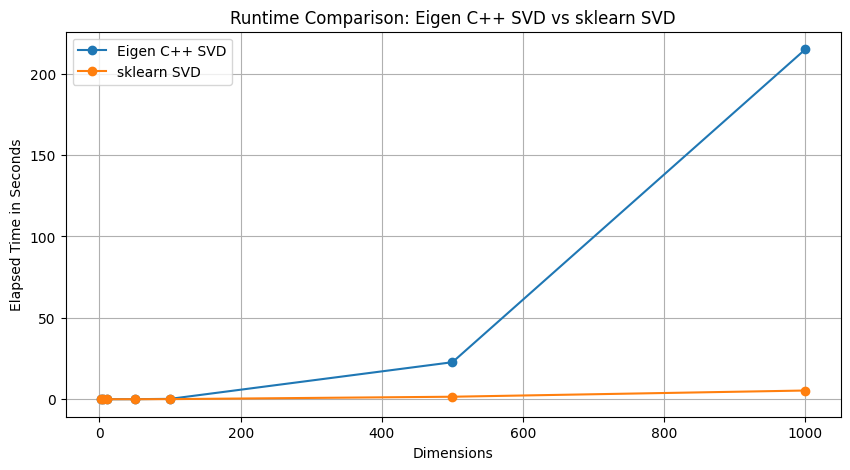

In [16]:
import matplotlib.pyplot as plt

# Data
dimensions = [2, 5, 10, 50, 100, 500, 1000]
eigen_times = [0, 0, 0, 0.0316364, 0.219676, 22.7468, 215.068]
sklearn_times = [0.00887298583984375, 0.00217437744140625, 0.0026166439056396484, 0.011098384857177734, 0.0623478889465332, 1.5306024551391602, 5.348968029022217]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(dimensions, eigen_times, marker='o', label='Eigen C++ SVD')
plt.plot(dimensions, sklearn_times, marker='o', label='sklearn SVD')
plt.xlabel('Dimensions')
plt.ylabel('Elapsed Time in Seconds')
plt.title('Runtime Comparison: Eigen C++ SVD vs sklearn SVD')
plt.legend()
plt.grid(True)
plt.show()
